# Análisis de datos sobre empresas de taxis en Chicago

Tenemos 3 dataframe de datos con los que trabajar. El primero contiene los nombres de las empresas y el número de viajes realizados por los taxis propiedad de esas empresas. El segundo contiene los nombres de los lugares de parada (barrios) y el número promedio de viajes a esos barrios en noviembre del 2017. El primero y el segundo se utilizarán para el análisis principal. El tercer dataframe de datos contiene las fechas y horas de la recogida, las condiciones climaticas en el que comenzo el viaje. Este ultimo e igual de importante dataframe de datos se utilizará para la comprobación de hipótesis = "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

## Información General
importaremos las librerias necesarias:

In [6]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Ahora vamos a leer los archivos que se nos dan. Leamos el primer dataframe

In [7]:
company_data = pd.read_csv("C:/Users/USER/Documents/proyectos/proyecto 6 (terminado)/moved_project_sql_result_01.csv")

- `company_name` - nombre de la empresa de taxis
- `trips_amount` - el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

In [8]:
company_data.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [9]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


podemos observamos que no tenemos valores ausentes y que la columna presenta los tipos de datos correctos. Pasemos ahora al segundo conjunto de datos

---

cargamos el segundo archivo

In [10]:
dropoff_data = pd.read_csv("C:/Users/USER/Documents/proyectos/proyecto 6 (terminado)/moved_project_sql_result_04.csv")

- `dropoff_location_name` - barrios de Chicago donde finalizaron los viajes
- `average_trips` - el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

In [11]:
dropoff_data.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [12]:
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Observamos que no tenemos valores ausentes solo, que la columna average_trips es de tipo float. Tenemos que redondear los valores y cambiar el tipo a entero.

In [13]:
#utilizaremosel metodo round() para redondear los decimales
dropoff_data["average_trips"] = dropoff_data["average_trips"].round()
#convertiremos de tipo float a tipo int
dropoff_data["average_trips"] = dropoff_data["average_trips"].astype(int)
#mostraremos los cambios efectuados
dropoff_data.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


## Análisis exploratorio de datos

Los 10 identificar principales barrios en términos de finalización del recorrido (paradas)
-
Podemos obtener esta información ordenando la tabla dropoff_data por orden descendente de la columna average_trips

In [14]:
#ordena los valores de dropoff_data por orden descendente de los valores de average_trips y toma lass primeras 10 filas
top10 = dropoff_data.sort_values(by='average_trips', ascending=False).head(10)
top10

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


vamos hacer grafico de barras

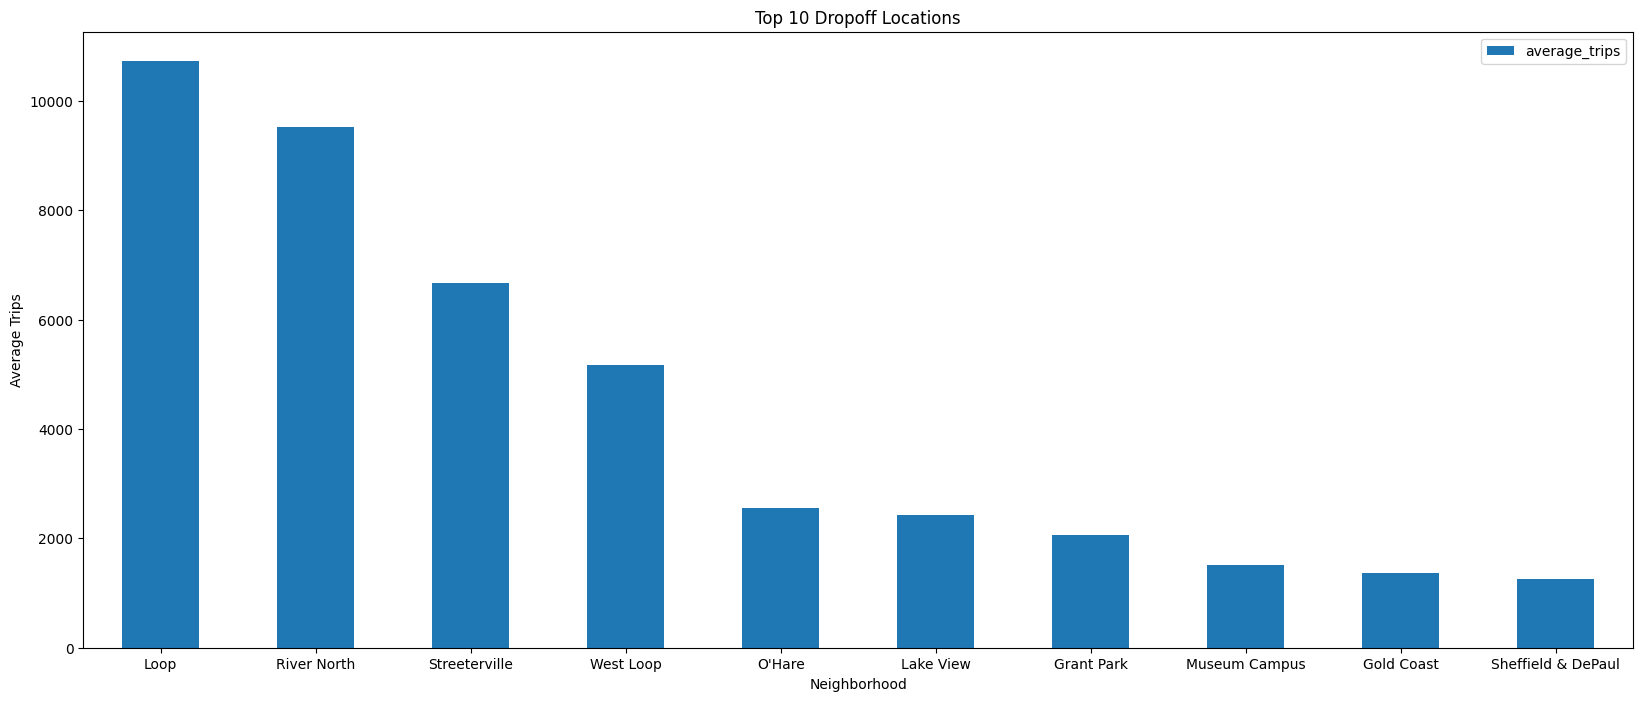

In [15]:
#trazaremos un gráfico de barras con un tamaño de 20 por 8 pulgadas
top10.plot.bar(x='dropoff_location_name', y='average_trips', rot=0, figsize=(20, 8))
plt.title('Top 10 Dropoff Locations')
plt.xlabel('Neighborhood')
plt.ylabel('Average Trips')
plt.show()

Los tres destinos más populares son los barrios de **Looop**, **River North** y **Streeterville**, en ese orden. El menos popular es Sheffield y DePaul. Hay una diferencia significativa entre los tres primeros y el resto: el cuarto más popular (West Loop) tiene casi el doble de visitas que O'Hare.

Clasificación de las empresas de taxi por número de viajes finalizados.
-
Podemos trazar un gráfico de barras con estos datos de la tabla **"company_data"**. Dado que son 64, podemos hacer el diagrama de barras horizontal utilizando 'plot.barh' en lugar de 'plot.bar'. Verifiquemos el rango de valores en la columna importe_viajes obteniendo una descripción numérica de la columna.

In [16]:
#descripción estadistica de la columna trips_amount
company_data['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

Se observa que el valor mínimo en la columna **"trips_amount"** es de sólo 2 viajes. Tenemos que filtrar las empresas cuyas cifras no sean muy significativas o de mucha importancia para reducir el analisis y asi enfocarnos en las mas importantes. Podemos establecer un parametro cerca de los 500. Así que podemos crear una slice de nuestra tabla **"company_data"** para las filas donde el valor de la columna trips_amount es mayor o igual a 500 y trazar el gráfico de barras horizontales para esos valores.

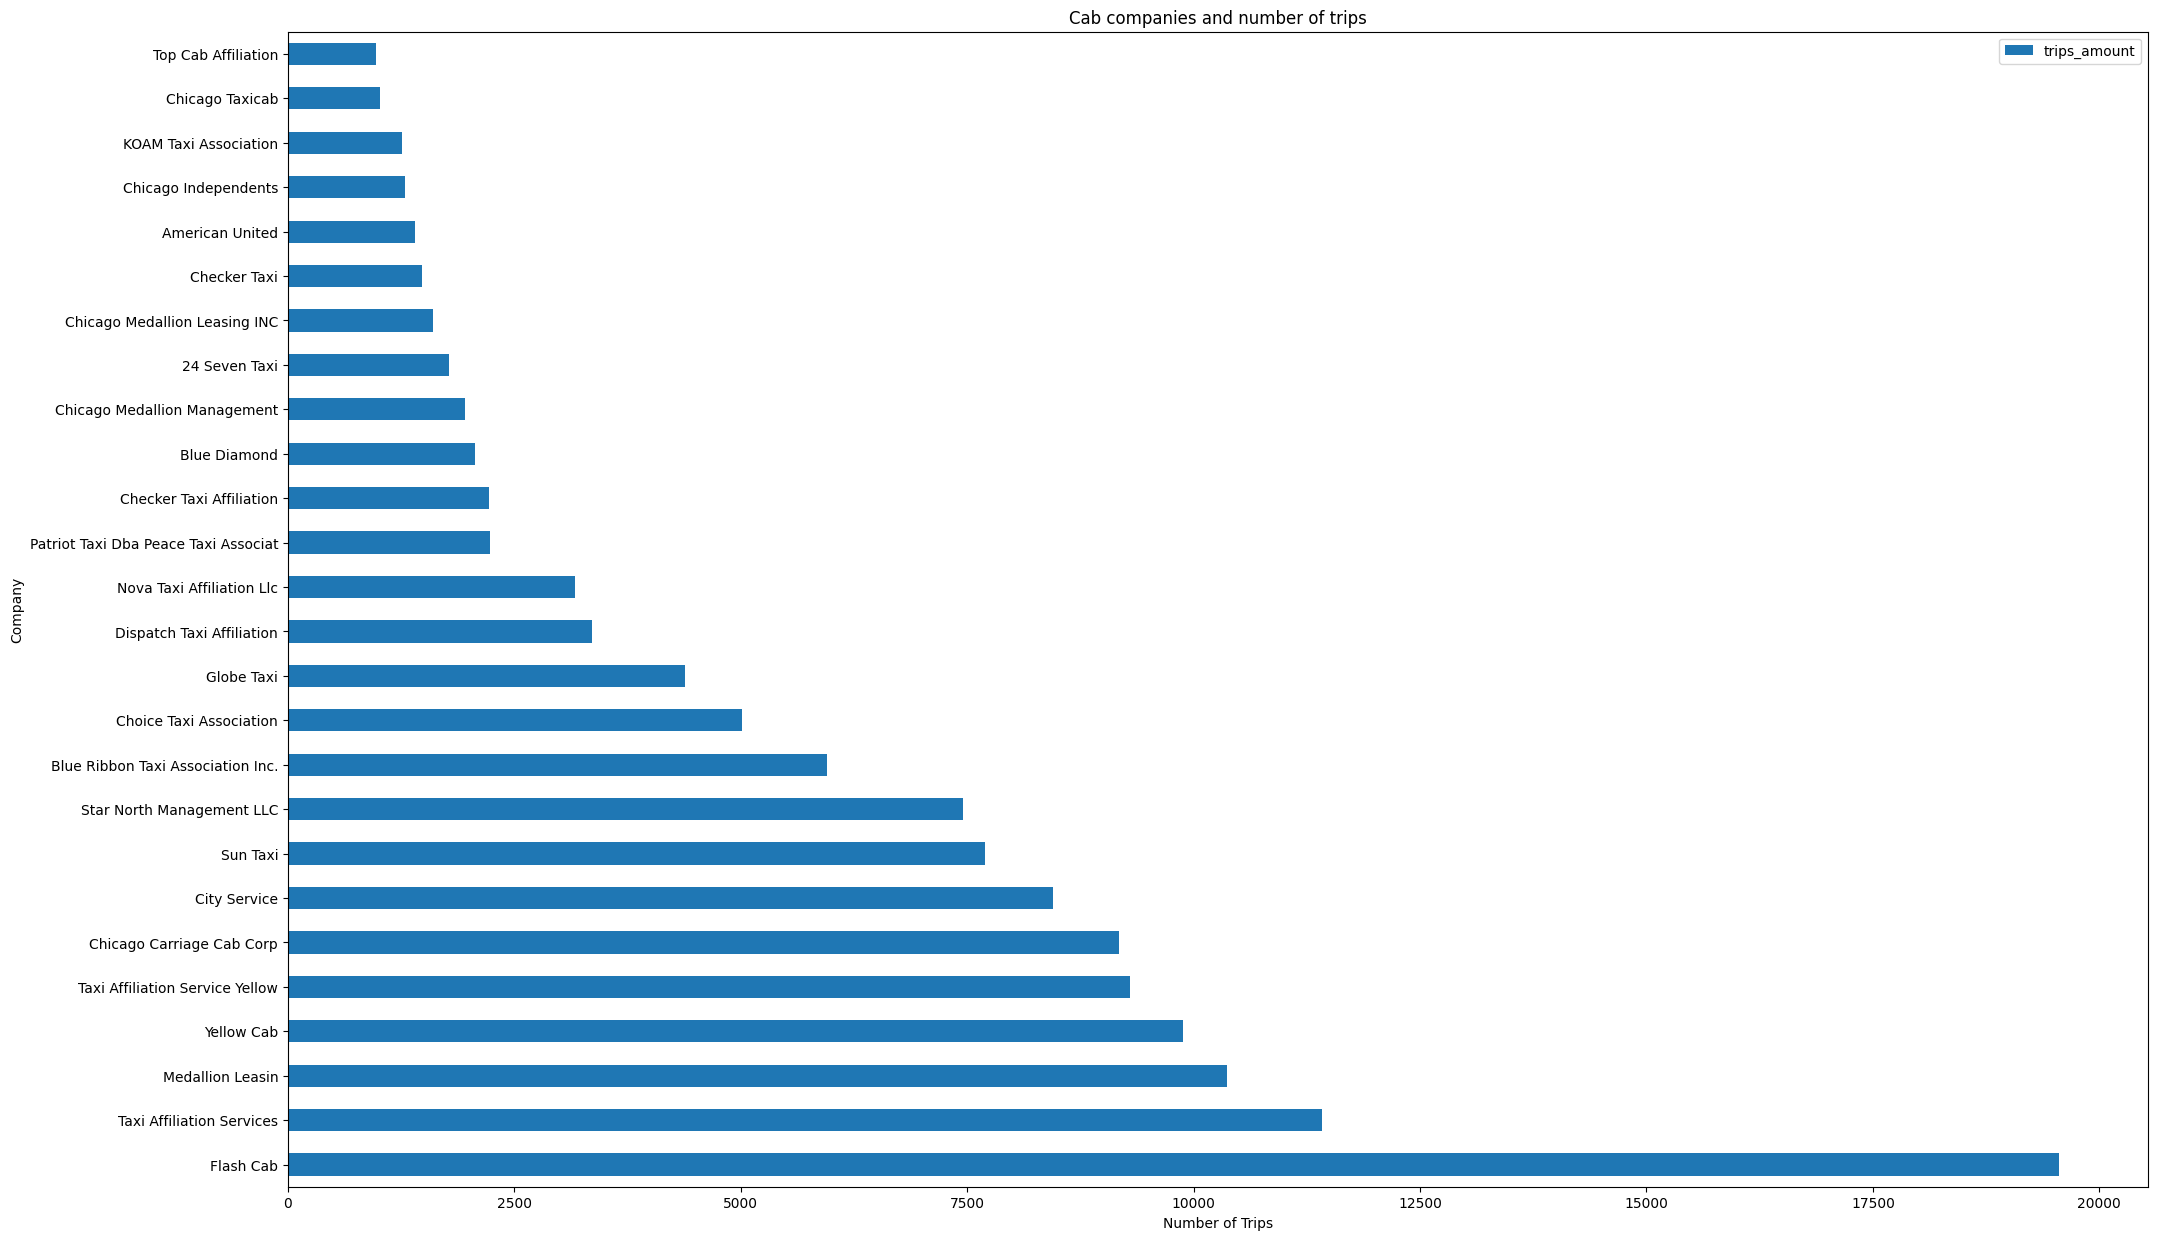

In [17]:
#graficaremos una grafica de barras en esta ocasion utilizando el barh() para que sea horizontalmente
company_data.query('trips_amount >= 500').plot.barh(x='company_name', y='trips_amount', rot=0, figsize=(24, 15))
plt.title('Cab companies and number of trips')
plt.xlabel('Number of Trips')
plt.ylabel('Company')
plt.show()

- La empresa **"Flash Cab"** está claramente como lider y primer lugar. Probablemente tengan más taxis en la carretera. 
- En segundo lugar está la empresa **"Taxi Affilliation Services"**. En comparacion creo tienen menos unidades rodando que su competencia **"Flash Cab"** 
- Después de filtrar un parametro por encima o igual que los 500 viajes, tenemos 26 empresas en nuestro gráfico. Eso significa que 38 empresas tienen menos de 500 viajes, por lo que la mayor parte de la cuota de mercado está en manos de un número menor de empresas.

---

## Prueba de hipótesis


*'La duración media de los trayectos entre el Loop y el aeropuerto internacional O'Hare cambia los sábados lluviosos'*
En primer lugar, tenemos que leer nuestro tercer conjunto de datos

In [18]:
#cargamos el archivo csv y lo convierte en un marco de datos llamado loop_ohare
loop_and_óhare = pd.read_csv('C:/Users/USER/Documents/proyectos/proyecto 6 (terminado)/moved_project_sql_result_07.csv') 

- `start_ts` — fecha y hora de la recogida
- `weather_conditions` - condiciones climáticas en el momento en el que comenzó el viaje
- `duration_seconds` - duración del viaje en segundos

In [19]:
loop_and_óhare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [20]:
loop_and_óhare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Tenemos dos problemas visibles que es cambiar el tipo de datos de la columna **"start_ts"** a  tipo datetime. Utilizando el método 'pd.to_datetime', el argumento de formato será '%Y%m%d %H%M%S' el otro cambio sera convertir la columna **"duration_seconds"** de float a tipo int

In [21]:
#convertimos la columna "start_ts" de object a datetime
loop_and_óhare['start_ts']=pd.to_datetime(loop_and_óhare['start_ts'], format='%Y-%m-%d %H:%M:%S')
loop_and_óhare["duration_seconds"] = loop_and_óhare["duration_seconds"].astype(int)
loop_and_óhare.info()#general info about loop_ohare
loop_and_óhare.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 21.0+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


hagamos dos filtros: uno en el que el valor de la columna weather_conditions sea **"Good"**, y otro en el que el valor sea **"Bad"**

In [22]:
#creamos slices donde condicion del clima es "Good"
good_weather = loop_and_óhare.query('weather_conditions == "Good"')
good_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            888 non-null    datetime64[ns]
 1   weather_conditions  888 non-null    object        
 2   duration_seconds    888 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 24.3+ KB


In [23]:
#creamos slices donde condicion del clima es "Bad"
bad_weather = loop_and_óhare.query('weather_conditions == "Bad"')
bad_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 4.9+ KB


- Nuestra hipótesis nula será: 'La duración promedio de los trayectos desde el Loop al Aeropuerto Internacional O'Hare es la misma los sábados lluviosos'. Por lo tanto. 
- Nuestra hipótesis alternativa será: La duración promedio de los trayectos desde el Loop al aeropuerto internacional O'Hare cambia los sábados lluviosos".
- Fijaremos alpha en el 5%. Si el valor p devuelto es mayor que nuestro alpha, entonces las varianzas pueden considerarse homogéneas. Si es inferior a nuestro alpha, las varianzas no pueden considerarse homogéneas.

In [24]:
alpha = 0.05
result = st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'], center='mean')
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('Las desviaciones son aproximadamente las mismas')
else:
    print('Las varianzas están demasiado alejadas para considerarse homogéneas')

p-value: 0.3968505113995001
Las desviaciones son aproximadamente las mismas


El valor p es mayor que alpha, por lo que podemos considerar que las varianzas son iguales para nuestra prueba de hipótesis. Para comprobar nuestra hipótesis, utilizaremos el método st.ttest_ind() que comprueba la probabilidad de que las medias de 2 poblaciones estadísticas. También devuelve un valor p que compararemos con nuestro alpha. Si el valor p es mayor que nuestro alpha, significa que es probable que las medias sean iguales, en cuyo caso **"no podemos rechazar nuestra hipótesis nula"**. En caso contrario, **"podemos rechazar la hipótesis nula"**.

In [25]:
alpha = 0.05 
result = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=True)
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('No podemos rechazar la hipótesis nula')
else:
    print('Rechazamos la hipótesis nula')

p-value: 6.517970327099473e-12
Rechazamos la hipótesis nula


El valor p fue menor que nuestro alfa, por lo tanto rechazamos nuestra hipótesis Nula sosteniendo la afirmación de que: "La duración promedio de los trayectos del Loop al aeropuerto internacional O'Hare cambia los sábados lluviosos".

## Conclusión

- hicimos algunas modificaciones como cambio de tipo de columna de ej: float a tipo int y object a datetime dejando nuestros dataframe limpios paraun correcto analisis y asi pudimos llevar a cabo
- Clasificación de los 10 mejores barrios. Como también clasificamos las empresas de taxis y observamos el dominio absoluto de Flash Cab. También probamos y confirmamos la hipótesis de que la duración promedio de los trayectos del Loop al aeropuerto internacional O'Hare cambia los sábados de lluviosos.